In [520]:
# Análise de dados de apoio às eleições 2020 sobre os candidatos de São José dos Campos.
#
# Origem dos dados: Repositório de dados eleitorais do TSE
#
# https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
# https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf


In [521]:
# Importamos as bibliotecas;
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

low_memory = False
%matplotlib inline
sb.set(style="darkgrid")

In [522]:
# Utilizamos a variável "filename" para receber o arquivo e outra variável "df 
# para armazenar o mesmo arquivo após leitura em formato CSV
filename = 'datasets/dados-compilados-tse.csv'
df = pd.read_csv(filename, encoding='latin-1')

renamed_columns = {
    'NR_CANDIDATO': 'NUMERO',
    'NM_URNA_CANDIDATO': 'CANDIDATO',
    'DS_CARGO': 'CARGO',
    'DS_COR_RACA': 'COR_RACA',
    '2006_VALOR': 'VALOR_2006',
    '2006_CANDIDATO': 'CANDIDATO_2006',
    '2008_VALOR': 'VALOR_2008',
    '2008_CANDIDATO': 'CANDIDATO_2008',
    '2010_VALOR': 'VALOR_2010',
    '2010_CANDIDATO': 'CANDIDATO_2010',
    '2012_VALOR': 'VALOR_2012',
    '2012_CANDIDATO': 'CANDIDATO_2012',
    '2014_VALOR': 'VALOR_2014',
    '2014_CANDIDATO': 'CANDIDATO_2014',
    '2016_VALOR': 'VALOR_2016',
    '2016_CANDIDATO': 'CANDIDATO_2016',
    '2018_VALOR': 'VALOR_2018',
    '2018_CANDIDATO': 'CANDIDATO_2018',
    '2020_VALOR': 'VALOR_2020',
    '2020_CANDIDATO': 'CANDIDATO_2020'
}

df.rename(columns = renamed_columns, inplace = True)

colunas_candidatos = ['NUMERO', 'CANDIDATO', 'CARGO', 'COR_RACA']
colunas_declaracoes = ['VALOR_2006', 'VALOR_2008', 'VALOR_2010', 'VALOR_2012', 'VALOR_2014', 'VALOR_2016', 'VALOR_2018', 'VALOR_2020']
colunas_candidaturas = ['CANDIDATO_2006', 'CANDIDATO_2008', 'CANDIDATO_2010', 'CANDIDATO_2012', 'CANDIDATO_2014', 'CANDIDATO_2016', 'CANDIDATO_2018', 'CANDIDATO_2020']

colunas_anos = ['2006', '2008', '2010', '2012', '2014', '2016', '2018', '2020']

df = df[colunas_candidatos + colunas_declaracoes + colunas_candidaturas]

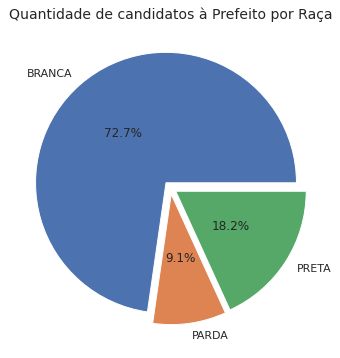

In [523]:
df_prefeitos = df.query('CARGO == "PREFEITO"')

prefeitos_racas = df_prefeitos.groupby(by='COR_RACA')['COR_RACA'].count()

pie, ax = plt.subplots(figsize=(10,6))
labels = prefeitos_racas.keys()
explode = len(prefeitos_racas) * [0.05]

plt.pie(x=prefeitos_racas, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5)
plt.title("Quantidade de candidatos à Prefeito por Raça", fontsize=14);

In [530]:
# define funções pra construir os dataframes de candidaturas

import math

def get_candidatura(row, candidatura, valor):
    if str(row[candidatura]) != '0':
        return row[valor]
    else:
        return math.nan
    
def build_candidatura(df, ano):
    coluna_valor = "VALOR_" + str(ano)
    coluna_candidato = "CANDIDATO_" + str(ano)
    
    return df.apply(lambda row: get_candidatura(row, coluna_candidato, coluna_valor), axis=1)

In [531]:
df_prefeitos_hist = df_prefeitos.copy()

for prefeito in df_prefeitos['CANDIDATO']:
    df_prefeito

# itera sobre os anos para construir as declarações de patrimônio dos candidatos
for ano in colunas_anos:
    df_prefeitos_hist[ano] = build_candidatura(df_prefeitos, ano)

# exibe somente as colunas com nome do candidato e os anos
df_prefeitos_hist[['CANDIDATO'] + colunas_anos]

,CANDIDATO,2006,2008,2010,2012,2014,2016,2018,2020
79,SENNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538466.93
91,PROFESSOR AGLIBERTO,NaN,NaN,NaN,NaN,NaN,NaN,2000.00,250000.00
115,JOAO BOSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1292363.65
185,WAGNER BALIEIRO,NaN,83000.0,168727.55,148924.82,NaN,341040.09,321876.04,381724.42
213,CORONEL ELIANE NIKOLUK,NaN,NaN,NaN,NaN,NaN,NaN,1023920.84,1104359.23
302,LUIZ CARLOS,NaN,NaN,NaN,NaN,NaN,0.00,NaN,200000.00
310,FELICIO,NaN,NaN,NaN,NaN,NaN,1216698.99,NaN,1266822.89
314,RAQUEL DE PAULA,NaN,NaN,NaN,65000.00,150000.0,0.00,0.00,0.00
346,MARINA DO PSOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31488.00
394,RENATA PAIVA,4716000.0,5269000.0,NaN,5495000.00,NaN,2395000.00,871900.00,1920000.00


<AxesSubplot:xlabel='ANO', ylabel='PATRIMONIO'>

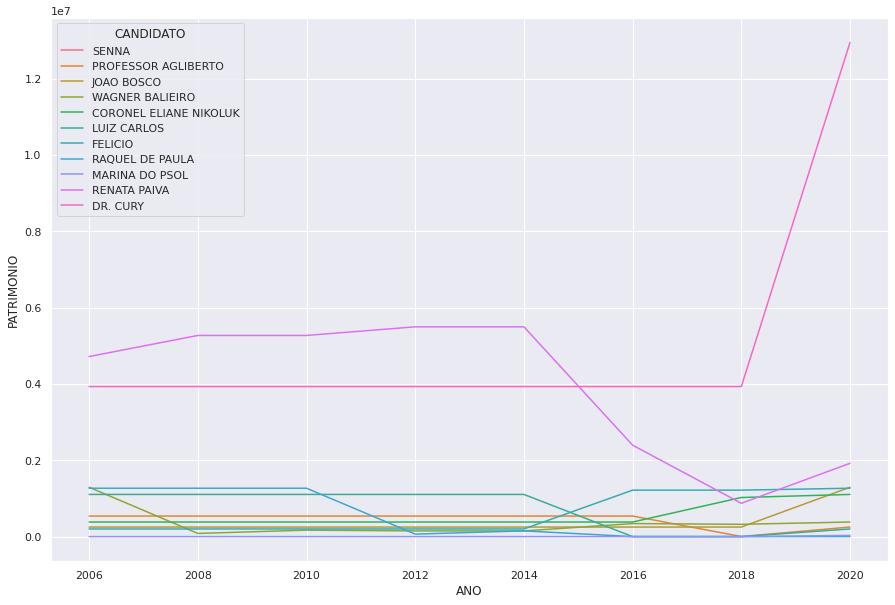

In [546]:
df_prefeitos_hist = pd.DataFrame(columns = ['CANDIDATO', 'ANO', 'PATRIMONIO'])

def build_patrimonio(prefeito, ano):
    coluna_valor = "VALOR_" + str(ano)
    coluna_candidato = "CANDIDATO_" + str(ano)
    
    return get_candidatura(prefeito, coluna_candidato, coluna_valor)

for i, prefeito in df_prefeitos.iterrows():
    for ano in colunas_anos:
        prefeito_dict = {
            'ANO': int(ano),
            'CANDIDATO': prefeito['CANDIDATO'],
            'PATRIMONIO': build_patrimonio(prefeito, ano)
        }

        df_prefeitos_hist = df_prefeitos_hist.append(prefeito_dict, ignore_index=True)

df_prefeitos_hist = df_prefeitos_hist.fillna(method='ffill')
        
f, ax = plt.subplots(figsize=(15, 10))
# sb.scatterplot(ax=ax, x="ANO", y="PATRIMONIO", style='CANDIDATO', hue="CANDIDATO", size="PATRIMONIO", sizes=(20, 200), data=df_prefeitos_hist)

sb.lineplot(ax=ax, x="ANO", y="PATRIMONIO", hue="CANDIDATO", data=df_prefeitos_hist)